# Single Layer

In [1]:
#-*- coding: utf-8 -*-
import re #regular expression
import konlpy #형태소분석기
import numpy as np #계산
from glob import glob 
import os.path as path
from scipy.sparse import csr_matrix

seed = 1234

In [2]:
import data_helpers
# emo_class = "anger,happiness,disgust,surprise,fear,sadness".split(',')
emo_class = "anger,fear,surprise,disgust,happiness".split(',') #4개로 바꿔야
morph = True

x_text, x_orig, y = data_helpers.load_data_and_labels2(emo_class=emo_class, _morph=morph)
vocab_processor, x_train, y_train, x_dev, y_dev, x_train_text, x_dev_text, x_train_text_orig, x_dev_text_orig = data_helpers.make_voca_and_train_dev(x_text,x_orig, y)

# of anger : 4406
# of fear : 769
# of surprise : 1219
# of disgust : 1485
# of happiness : 1434
x_text 9313
y 9313
Vocabulary Size: 8890
Train/Dev split: 7917/1396


In [3]:
max_document_length = max([len(x.split(" ")) for x in x_text])

In [4]:
import tensorflow as tf


acs = []
with tf.Session() as sess:
    X = tf.placeholder(dtype=tf.float32, shape=[None, max_document_length])
    Y = tf.placeholder(dtype=tf.float32, shape=[None, len(emo_class)])
    W = tf.Variable(tf.random_uniform([max_document_length, len(emo_class)]))
    b = tf.Variable(tf.random_uniform([len(emo_class)]))

    r = tf.nn.softmax(tf.nn.relu(tf.matmul(X, W) + b))
    cross_entropy = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(r), reduction_indices=[1]))

    learning_rate = 10
    
    #식 정의(박스안) 객체생성(tf와 통신)
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)
    
    #test
    correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(r, 1)) #제일높은것의 index 각 문장마다
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) #평균 boolean->float

    sess.run(tf.global_variables_initializer())
    
    
    
    
    
    #
    
   
    #
    
    
    
    
    
    #학습 수행
    for epoch in range(100):
        # train
        sess.run(optimizer, feed_dict={X:x_train, Y:y_train})
        if not epoch % 5:
            acc = sess.run(accuracy, feed_dict={X:x_dev, Y:y_dev}) #test
            print('epoch : %10d, accuracy : %.5f' % (epoch, acc))
            acs.append((epoch, acc))

epoch :          0, accuracy : 0.47569
epoch :          5, accuracy : 0.47569
epoch :         10, accuracy : 0.47569
epoch :         15, accuracy : 0.47569
epoch :         20, accuracy : 0.47569
epoch :         25, accuracy : 0.47569
epoch :         30, accuracy : 0.47569
epoch :         35, accuracy : 0.47569
epoch :         40, accuracy : 0.47569
epoch :         45, accuracy : 0.47569
epoch :         50, accuracy : 0.47569
epoch :         55, accuracy : 0.47569
epoch :         60, accuracy : 0.47569
epoch :         65, accuracy : 0.47569
epoch :         70, accuracy : 0.47569
epoch :         75, accuracy : 0.47569
epoch :         80, accuracy : 0.47569
epoch :         85, accuracy : 0.47569
epoch :         90, accuracy : 0.47569
epoch :         95, accuracy : 0.47569


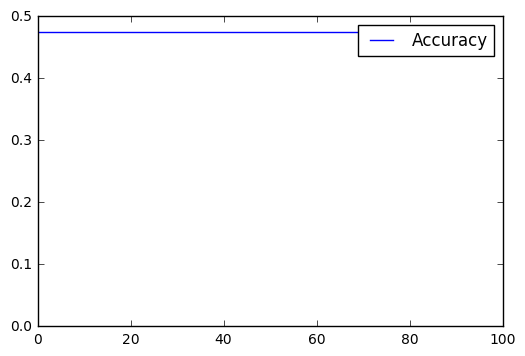

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
acs = np.array(acs)
plt.ylim([0, 0.5]) #y:0~0.5
plt.plot(acs[:, 0], acs[:, 1], label='Accuracy')
plt.legend() #도표 설명
plt.show() #그래픽 표현을 만들기 위해
